In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (20, 2, 4000)   float64   


In [3]:
hdu = hdul[0]
data = hdu.data
data

array([[[1.02733700e+06, 6.96227980e+00, 7.42099991e+01, ...,
         2.88849996e+01, 0.00000000e+00, 7.40675000e+01],
        [0.00000000e+00, 3.09767991e-01, 0.00000000e+00, ...,
         3.29800018e-01, 0.00000000e+00, 2.00000000e-03]],

       [[1.16144700e+06, 4.16810989e+00, 3.63199997e+01, ...,
         5.85422713e+01, 0.00000000e+00, 3.64126000e+01],
        [0.00000000e+00, 8.03358018e-01, 0.00000000e+00, ...,
         4.85437113e-01, 0.00000000e+00, 3.80000000e-03]],

       [[1.16345300e+06, 4.44000006e+00, 4.03300018e+01, ...,
         2.53728516e+01, 0.00000000e+00, 4.03300000e+01],
        [0.00000000e+00, 3.15701991e-01, 0.00000000e+00, ...,
         2.22888550e-01, 0.00000000e+00, 3.70000000e-03]],

       ...,

       [[1.27846830e+07, 3.74499989e+00, 2.87199993e+01, ...,
         1.05284650e+01, 0.00000000e+00, 2.92100000e+01],
        [0.00000000e+00, 1.44336998e+00, 0.00000000e+00, ...,
         9.80607243e-02, 0.00000000e+00, 9.80000000e-03]],

       [[1.27849480

In [4]:
data_USE = np.transpose(data)
Teff = np.array(data_USE[4,1,:])
nu_max = np.array(data_USE[2,0,:])

In [5]:
Teff

array([4673., 4784., 5026., ..., 4991., 4889., 4644.])

In [6]:
nu_max

array([74.20999908, 36.31999969, 40.33000183, ..., 28.71999931,
       34.08000183, 50.59999847])

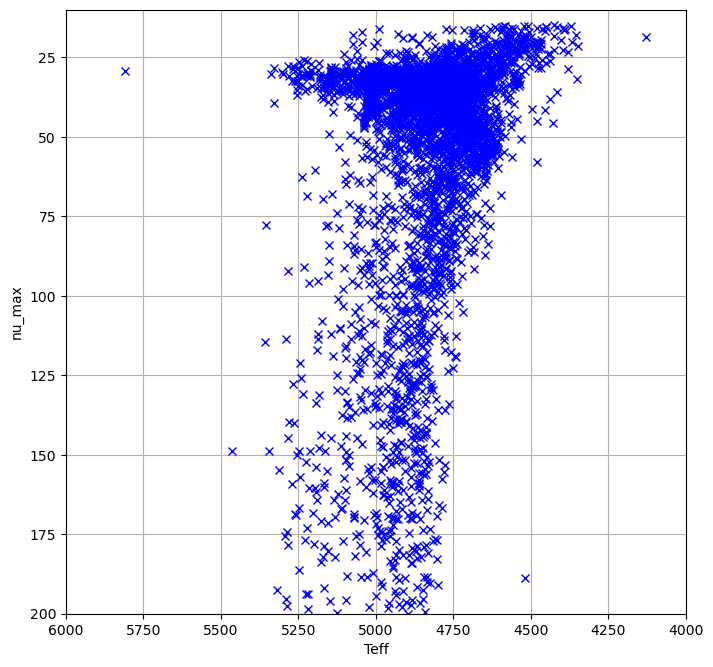

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
plt.plot(Teff, nu_max, 'bx')
plt.xlim(6000, 4000)
plt.ylim(200, 10)
plt.xlabel('Teff')
plt.ylabel('nu_max')
plt.show()

In [8]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Joined        1 BinTableHDU   1129   23363R x 430C   [20A, K, 20A, 20A, D, D, D, D, E, E, E, E, E, E, E, E, E, E, 23A, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 5A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [9]:
#prihdr = hdul[0].header #accesses primary header
hdu = hdul[1]
hdu.header #should show all column headers

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2272 / length of dimension 1                          
NAXIS2  =                23363 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  430 / number of table fields                         
TTYPE1  = 'KEPLER_ID'                                                           
TFORM1  = '20A     '                                                            
TTYPE2  = 'KEPLER_INT'                                                          
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [10]:
TeffSun = 5774
gSun = 27395.9
numaxSun = 3090
gStar = ((Teff**0.5)*(nu_max)*(gSun))/((TeffSun**0.5)*(numaxSun))

In [11]:
Logg_A = hdu.data['LOGG_COR']
Logg_err = hdu.data['LOGG_COR_ERR']
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
FeH_A = hdu.data['FE_H_ADOP_COR']
print(max(FeH_A))
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
FeH_FIT = hdu.data['FE_H_ADOP_FIT']
Teff_FIT = hdu.data['TEFF_FIT']
Star_radius = hdu.data['HUBER_R'] #might need to change to more recent data
print(Star_radius)

0.56656843
[0.829 0.799 0.824 ... 9.355 1.399 9.894]


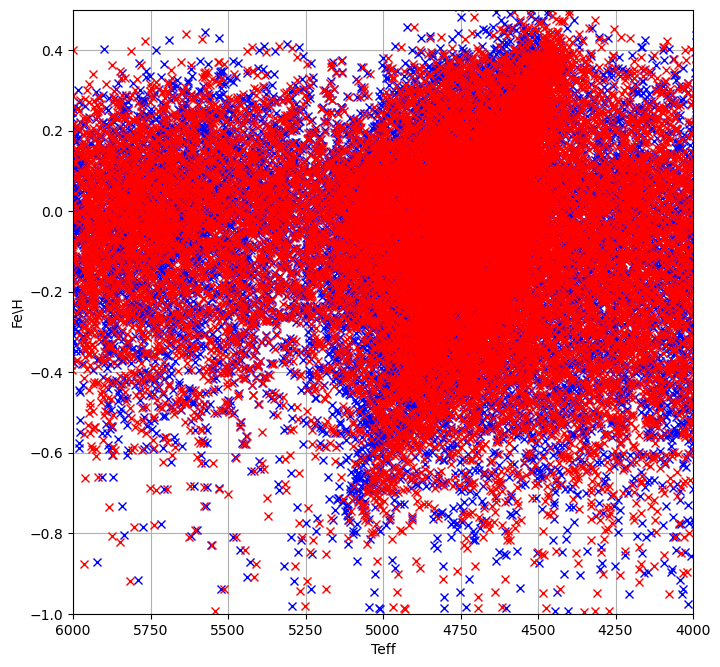

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
x1 = Teff_A
x2 = Teff_FIT
y1 = FeH_A
y2 = FeH_FIT
plt.xlim(6000, 4000)
plt.ylim(-1.0, 0.5)
plt.xlabel('Teff')
plt.ylabel('Fe\H')
plt.plot(x1, y1, 'bx') #this is not right. Other order shows weird vertical lines. It's encountering errors when trying to use log scale.
#how to scale? Also how to input error params and exclude the 9 targets?
plt.plot(x2, y2, 'rx')
plt.show()

In [13]:
import pandas as pd
with fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits") as data:
    df = pd.DataFrame(data[0].data) #do same thing with APOGEE file? How to check matches for kic nums? I think you
    #use 'KEPLER_INT'
#compare background params of APOGEE to metallicity params of APOKASC -- graphs

In [14]:
KIC_num = hdu.data['KEPLER_INT']
hdul_back = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdu_back = hdul_back[0]
data_back = hdu_back.data
data_USE_back = np.transpose(data_back)
KIC_back = np.array(data_USE[0,0,:])
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
Logg_err = hdu.data['LOGG_COR_ERR']
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
logg_A = hdu.data['LOGG_COR']
FeH_A = hdu.data['FE_H_ADOP_COR']
Huber_radius = hdu.data['HUBER_R ']
Huber_radius_P_err = hdu.data['HUBER_R_PERR']
Huber_radius_M_err = hdu.data['HUBER_R_MERR']
#print(Huber_radius_err)
Amp_HV1 = np.array(data_USE[6,0,:])
Amp_HV1_err = np.array(data_USE[6,1,:])
Amp_HV2 = np.array(data_USE[9,0,:])
Amp_HV2_err = np.array(data_USE[9,1,:])
Freq_HV1 = np.array(data_USE[7,0,:])
Freq_HV1_err = np.array(data_USE[7,1,:])
Freq_HV2 = np.array(data_USE[10,0,:])
Freq_HV2_err = np.array(data_USE[10,1,:])
Evol_stage = np.array(data_USE[3, 0, :])
#Evol_stage
#Evol_stage = 1 - red giant, #2- red clump
#make color coded plot (or seperate ones for red giant branch and red clump) after other backg. plots

In [234]:
import numpy as np
common_KIC, Teff_indexes, Amp_indexes = np.intersect1d(KIC_num, KIC_back, return_indices=True)
good_indecies = np.where(Teff_A[Teff_indexes]*Huber_radius[Teff_indexes] > 0)
print(np.where(Teff_A[Teff_indexes] < 0))
print(np.where(Huber_radius[Teff_indexes] < 0))

Amp_indexes = Amp_indexes[good_indecies]
Teff_indexes = Teff_indexes[good_indecies]
logg_final = Logg_A[Teff_indexes]
logg_final_err = Logg_err[Teff_indexes]
Teff_final = Teff_A[Teff_indexes]
log_Teff_final = np.log10(Teff_final)
Teff_final_err = Teff_err[Teff_indexes]
Teff_err_log = ((Teff_final_err)/(Teff_final))/np.log(10)

Huber_radius_final = Huber_radius[Teff_indexes]
Huber_radius_err_final = (np.sqrt(Huber_radius_P_err[Teff_indexes])) * (np.sqrt(np.abs(Huber_radius_M_err[Teff_indexes])))

print(Huber_radius_err_final)

print(Huber_radius_err_final/Huber_radius_final)
FeH_final = FeH_A[Teff_indexes]
FeH_final_err = FeH_err[Teff_indexes]
Amp_HV1_final = Amp_HV1[Amp_indexes]
rpw = 0
Amp_HV1_R =  Amp_HV1[Amp_indexes] * Huber_radius_final**rpw
Amp_HV1_final_err = Amp_HV1_err[Amp_indexes]
print(Amp_HV1_final_err)
Amp_HV1_R_err = ((Amp_HV1_err[Amp_indexes]/Amp_HV1[Amp_indexes]) + (rpw*Huber_radius_err_final/Huber_radius_final)) * Amp_HV1_R
print(Amp_HV1_R_err)
Amp_HV2_final = Amp_HV2[Amp_indexes]
Amp_HV2_R = Amp_HV2[Amp_indexes] * Huber_radius_final**rpw
Amp_HV2_R_err = ((Amp_HV2_err[Amp_indexes]/Amp_HV2[Amp_indexes]) + (rpw*Huber_radius_err_final/Huber_radius_final)) * Amp_HV2_R
Amp_HV2_final_err = Amp_HV2_err[Amp_indexes]
print(Amp_HV2_final_err/Amp_HV2_final)
print(Amp_HV2_R_err/Amp_HV2_R)
Evol_stage_final = Evol_stage[Amp_indexes]
#print(Evol_stage_final)
Freq_HV1_final = Freq_HV1[Amp_indexes]
Freq_HV1_final_err = Freq_HV1_err[Amp_indexes]
Freq_HV2_final = Freq_HV2[Amp_indexes]
Freq_HV2_final_err = Freq_HV2_err[Amp_indexes]
Amp_HV1_err_log = ((Amp_HV1_final_err)/(Amp_HV1_final))/np.log(10)
Amp_HV2_err_log = ((Amp_HV2_final_err)/(Amp_HV2_final))/np.log(10)
Freq_HV1_err_log = ((Freq_HV1_final_err)/(Freq_HV1_final))/np.log(10)
Freq_HV2_err_log = ((Freq_HV2_final_err)/(Freq_HV2_final))/np.log(10)
Amp_HV1_R_err_log = ((Amp_HV1_R_err)/(Amp_HV1_R))/np.log(10)
Amp_HV2_R_err_log = ((Amp_HV2_R_err)/(Amp_HV2_R))/np.log(10)
#print(Amp_HV1, Amp_HV1_final_err)
#print(Amp_HV1_err_log, Amp_HV2_err_log, Freq_HV1_err_log, Freq_HV2_err_log)
#print(Amp_HV1_final_err, Amp_HV2_final_err, Freq_HV1_final_err, Freq_HV2_final_err)
#Teff_final = Teff_final[good_indecies]
#print(FeH_final)
#print(min(FeH_final))
#print(max(FeH_final))
#np.size(Teff_final)
np.size(Amp_indexes)

(array([ 318,  761,  794, 2156, 2211, 3250, 3297, 3401, 3605], dtype=int64),)
(array([639], dtype=int64),)
[1.7242533 2.211651  2.1797092 ... 3.7342916 2.2147913 1.7258259]
[0.1796846  0.1295864  0.12904559 ... 0.21533224 0.1396904  0.16212548]
[ 103.12402906  644.14808811  469.43677855 ... 1264.3873675   612.43433845
  370.48811596]
[ 103.12402906  644.14808811  469.43677855 ... 1264.3873675   612.43433845
  370.48811596]
[0.06446614 0.13967215 0.10261896 ... 0.09464093 0.0929494  0.08965754]
[0.06446614 0.13967215 0.10261896 ... 0.09464093 0.0929494  0.08965754]


3990

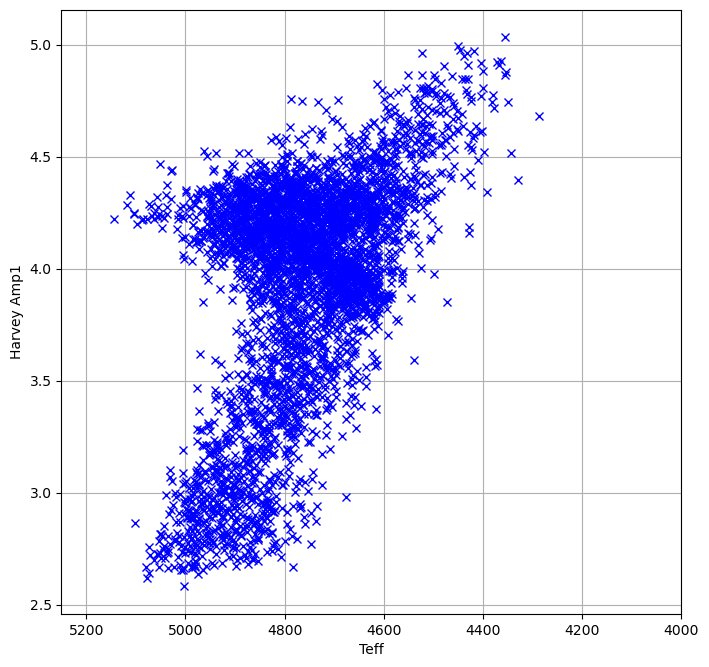

In [235]:
#Teff vs Harvey Amp 1
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV1_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Amp1')
plt.plot(Teff_final, y, 'bx')
plt.show()
#try log10 scaling, which one works better for other graphs (normally for harv freq)

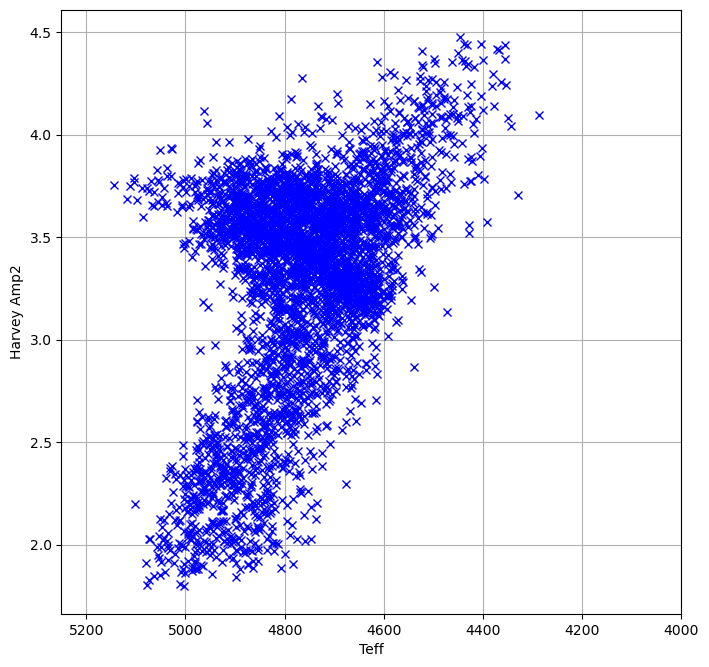

In [236]:
#Teff vs Harvey Amp 2
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV2_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Amp2')
plt.plot(Teff_final, y, 'bx')
plt.show()

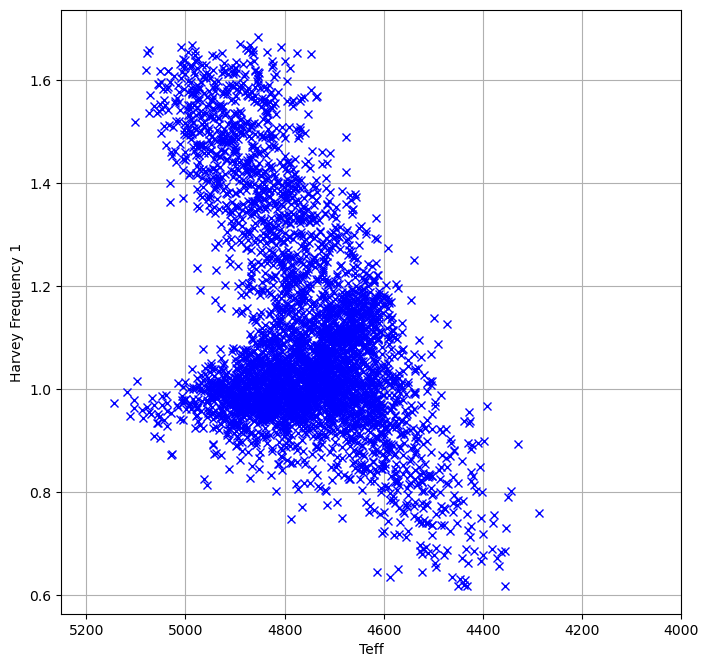

In [237]:
#Teff vs Harvey Frequency 1 -- is this what we wanted? Or switch axes
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Freq_HV1_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Frequency 1')
plt.plot(Teff_final, y, 'bx')
plt.show()

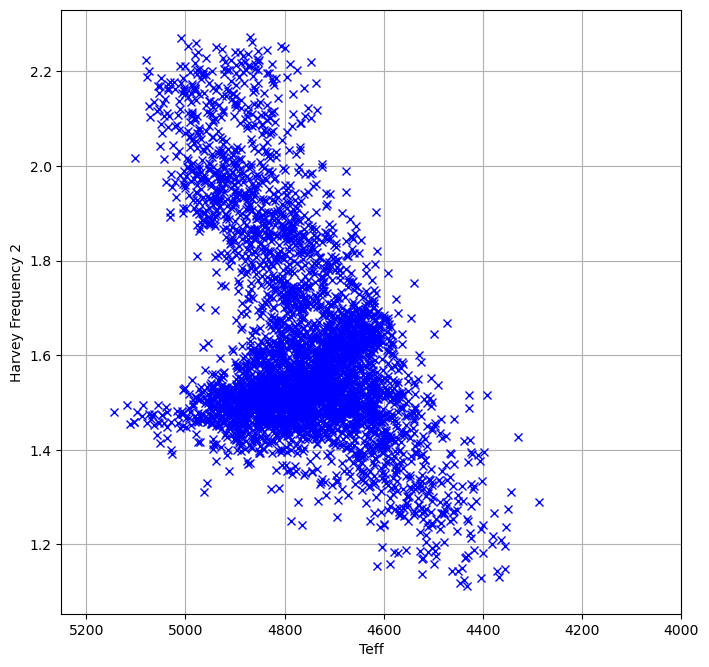

In [238]:
#Teff vs Harvey Frequency 2
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Freq_HV2_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Frequency 2')
plt.plot(Teff_final, y, 'bx')
plt.show()

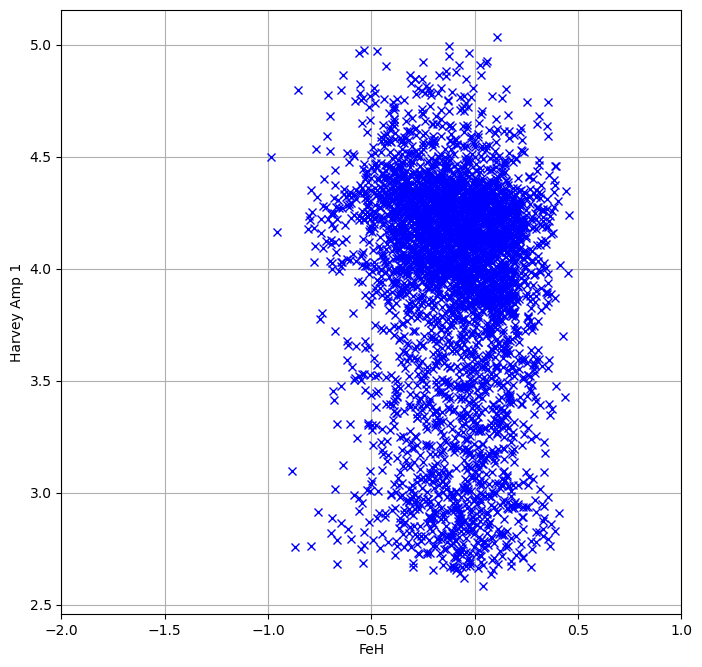

In [239]:
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV1_final)
plt.xlim(-2, 1)
plt.xlabel('FeH')
plt.ylabel('Harvey Amp 1')
plt.plot(FeH_final, y, 'bx')
plt.show()

A1
[19.78408229 -2.96530394 -1.92559271  0.06978815]
[0.94250034 0.26089712 0.00986411 0.01045075]
A2
[16.93070245 -2.27120457 -2.06113138  0.06071883]
[1.04251948 0.28880814 0.01118793 0.01143371]


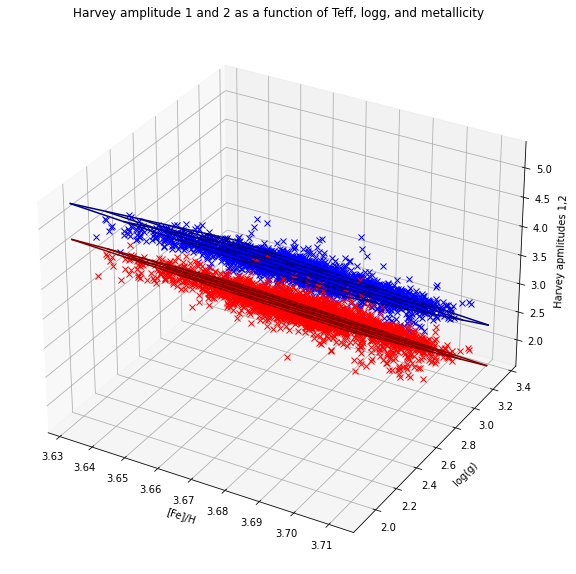

In [240]:
from scipy.optimize import curve_fit

%matplotlib inline
def amp_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV1_final), sigma=(Amp_HV1_err_log))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1')
print(A1_opt)
print(A1_perr)

Nt = 6 
NFeH = 6
X_grid = np.indices((Nt, NFeH))

logT_grid = (X_grid[0,:,:]*(max(np.log10(Teff_final))-min(np.log10(Teff_final))))/(Nt-1)+min(np.log10(Teff_final))
logg_grid = (X_grid[1,:,:]*(max(logg_final)-min(logg_final)))/(NFeH-1)+min(logg_final)
FeH_grid = (X_grid[0,:,:])*0
log_A1_grid = amp_curve_fit((logT_grid, logg_grid, FeH_grid), A1_opt[0], A1_opt[1], A1_opt[2], A1_opt[3])


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_title('Harvey amplitude 1 and 2 as a function of Teff, logg, and metallicity')

ax.set_xlabel('[Fe]/H')
ax.set_ylabel('log(g)')
ax.set_zlabel('Harvey apmlitudes 1,2')

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV2_final), sigma=(Amp_HV2_err_log))
A2_perr = np.sqrt(np.diag(A2_cov))
log_A2_grid = amp_curve_fit((logT_grid, logg_grid, FeH_grid), A2_opt[0], A2_opt[1], A2_opt[2], A2_opt[3])
print('A2')
print(A2_opt)
print(A2_perr)

plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV1_final), 'bx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV2_final), 'rx')
ax.plot_wireframe(logT_grid, logg_grid, log_A1_grid, color='navy')
ax.plot_wireframe(logT_grid, logg_grid, log_A2_grid, color='maroon')

plt.show()

In [241]:
%matplotlib qt
from scipy.optimize import curve_fit

print(min(Amp_HV1_R))
print(max(Amp_HV1_R))

print(np.size(Huber_radius_final))
print(min(Huber_radius_final))
print(max(Huber_radius_final))


print(np.size(np.where(Huber_radius_final < 0)))

A1_opt_R, A1_cov_R = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV1_R), sigma=(Amp_HV1_R_err_log))
A1_perr_R = np.sqrt(np.diag(A1_cov_R))

A2_opt_R, A2_cov_R = curve_fit(amp_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Amp_HV2_R), sigma=(Amp_HV2_R_err_log))
A2_perr_R = np.sqrt(np.diag(A2_cov_R))

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV1_final), 'bx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV2_final), 'rx')
ax.plot_wireframe(logT_grid, logg_grid, log_A1_grid, color='navy')
ax.plot_wireframe(logT_grid, logg_grid, log_A2_grid, color='maroon')

plt.show()


381.9310547232643
107979.30198781028
3990
0.107
28.964
0


[-1.28429968  0.07131842  0.82948049 -0.0405379 ]
[0.42182499 0.11682457 0.00448279 0.00462808]
[-0.97990389  0.14221728  0.80518069 -0.02444849]
[0.3624151  0.10017588 0.0047108  0.0043383 ]


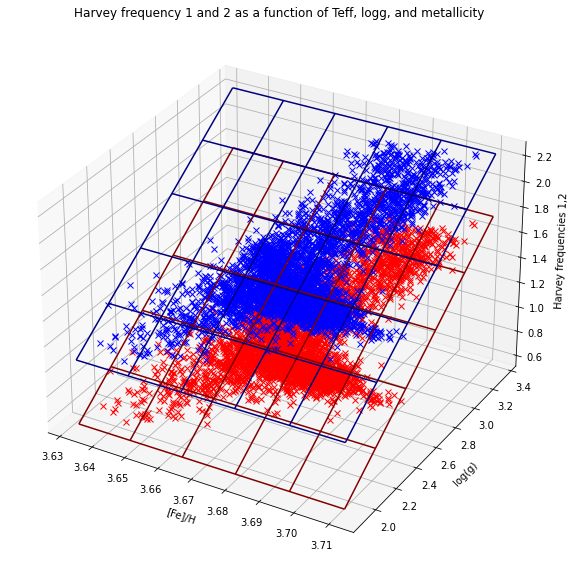

In [242]:
%matplotlib inline
def freq_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

F1_opt, F1_cov = curve_fit(freq_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Freq_HV1_final), sigma=(Freq_HV1_err_log))
F1_perr = np.sqrt(np.diag(F1_cov))

print(F1_opt)
print(F1_perr)

Nt = 6 
NFeH = 6
X_grid = np.indices((Nt, NFeH))

logT_grid = (X_grid[0,:,:]*(max(np.log10(Teff_final))-min(np.log10(Teff_final))))/(Nt-1)+min(np.log10(Teff_final))
logg_grid = (X_grid[1,:,:]*(max(logg_final)-min(logg_final)))/(NFeH-1)+min(logg_final)
FeH_grid = (X_grid[0,:,:])*0
log_F1_grid = freq_curve_fit((logT_grid, logg_grid, FeH_grid), F1_opt[0], F1_opt[1], F1_opt[2], F1_opt[3])

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.set_title('Harvey frequency 1 and 2 as a function of Teff, logg, and metallicity')

ax.set_xlabel('[Fe]/H')
ax.set_ylabel('log(g)')
ax.set_zlabel('Harvey frequencies 1,2')

F2_opt, F2_cov = curve_fit(freq_curve_fit, (np.log10(Teff_final), logg_final, FeH_final), np.log10(Freq_HV2_final), sigma=(Freq_HV2_err_log))
F2_perr = np.sqrt(np.diag(F2_cov))
log_F2_grid = freq_curve_fit((logT_grid, logg_grid, FeH_grid), F2_opt[0], F2_opt[1], F2_opt[2], F2_opt[3])

print(F2_opt)
print(F2_perr)

plt.plot(np.log10(Teff_final), logg_final, np.log10(Freq_HV1_final), 'rx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Freq_HV2_final), 'bx')
ax.plot_wireframe(logT_grid, logg_grid, log_F1_grid, color='maroon')
ax.plot_wireframe(logT_grid, logg_grid, log_F2_grid, color='navy')

plt.show()

A1_RG
[ 4.39373040e+01 -9.81143046e+00 -1.56287797e+00 -3.18182302e-02]
[1.86490789 0.52365769 0.02480848 0.01635822]
A1_RC
[ 76.84846738 -19.3475024   -0.60715572  -0.80702145]
[1.92789688 0.54355657 0.04246164 0.02359385]
A2_RG
[ 3.99003117e+01 -8.76840611e+00 -1.73252315e+00 -1.79513991e-02]
[2.05638854 0.57716448 0.02704051 0.01784273]
A2_RC
[ 78.15097818 -19.81187123  -0.70185917  -0.93976785]
[2.18056613 0.61335822 0.04567743 0.02631364]
A1_RG
[ 3.65813169 -9.74577057 -1.93046517 -0.03181822]
[0.00383677 0.5241141  0.01171757 0.01635822]
A1_RC
[  4.08887775 -19.31102412  -1.33376154  -0.80702152]
[0.01173118 0.54429956 0.03153781 0.02359385]
A2_RG
[ 2.99829497 -8.69710617 -2.06079608 -0.01795127]
[0.00425794 0.57765488 0.01283991 0.01784273]
A2_RC
[  3.42913338 -19.77150746  -1.44584802  -0.93976796]
[0.01267441 0.61411838 0.03396103 0.02631364]


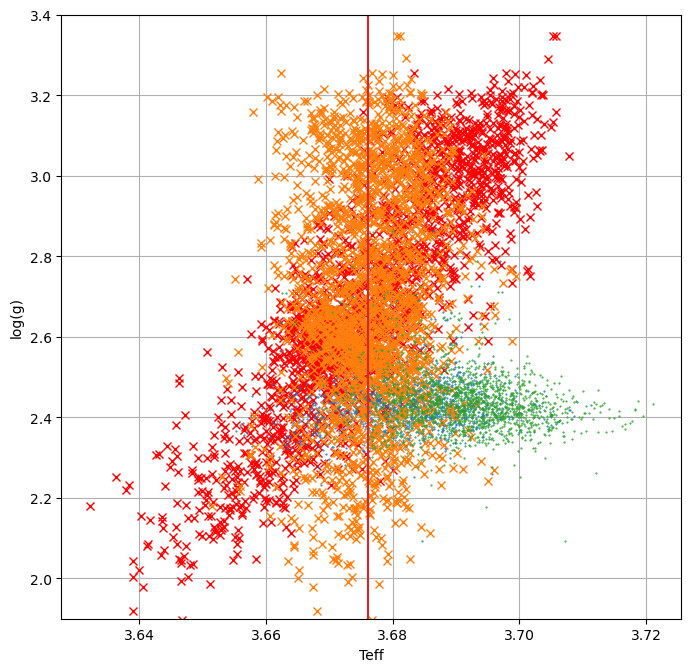

In [243]:
#Teff, logg graph with red giants & clump
%matplotlib inline
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
figure(figsize=(8,8), dpi=100)
plt.grid()

red_giant = np.where(Evol_stage_final == 1)
red_clump = np.where(Evol_stage_final == 2)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RG')
print(A1_opt)
print(A1_perr)

A1_opt, A1_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_perr = np.sqrt(np.diag(A1_cov))
print('A1_RC')
print(A1_opt)
print(A1_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_giant]), logg_final[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RG')
print(A2_opt)
print(A2_perr)

A2_opt, A2_cov = curve_fit(amp_curve_fit, (np.log10(Teff_final[red_clump]), logg_final[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_perr = np.sqrt(np.diag(A2_cov))
print('A2_RC')
print(A2_opt)
print(A2_perr)


def logg_fit(X, a, b):
    x = X
    return a + b*x
         
mean_logg = np.mean(logg_final[red_giant])
mean_l_teff = np.mean(np.log10(Teff_final[red_giant]))

logg_opt, logg_cov = curve_fit(logg_fit, (np.log10(Teff_final[red_giant])-mean_l_teff), logg_final[red_giant]-mean_logg, sigma=(logg_final_err[red_giant]))
logg_perr = np.sqrt(np.diag(logg_cov))

#print(logg_opt)
#print(logg_perr)

logg_opt[1] = 18.614913/0.7
theta = ((np.pi/2) - np.arctan2(logg_opt[1], 1))
#print(theta)

#rotated plots
x_prime = ((np.log10(Teff_final)-mean_l_teff)*np.cos(theta)) - ((logg_final-mean_logg)*np.sin(theta))
y_prime = ((np.log10(Teff_final)-mean_l_teff)*np.sin(theta)) + ((logg_final-mean_logg)*np.cos(theta))

#print(logg_opt[0])

#print(x_prime)
#print(y_prime)

coeffs = np.ones((4, 6, 2))
coeffs_err = np.ones((4, 6, 2))

#frequency 1 red giants
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV1_final[red_giant]), sigma=(Freq_HV1_err_log[red_giant]))
F1_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,0] = F1_x_opt
#print(coeffs[:,0,0])
#print(F1_x_opt)
coeffs_err[:,0,0] = F1_x_perr

#frequency 1 red clump
F1_x_opt, F1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV1_final[red_clump]), sigma=(Freq_HV1_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F1_x_cov))
#print(F1_x_opt)
#print(F1_x_perr)
coeffs[:,0,1] = F1_x_opt
coeffs_err[:,0,1] = F1_x_perr

#frequency 2 red giants
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Freq_HV2_final[red_giant]), sigma=(Freq_HV2_err_log[red_giant]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#in y direc -- dependancy very well constrained, x direc not really
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,0] = F2_x_opt
coeffs_err[:,1,0] = F2_x_perr

#frequency 2 red clump
F2_x_opt, F2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Freq_HV2_final[red_clump]), sigma=(Freq_HV2_err_log[red_clump]))
F2_x_perr = np.sqrt(np.diag(F2_x_cov))
#fit more well defined in x direc now in clump, y direc worse
#red giant and red clump have opposite metallicity dependancy -- interesting
#print(F2_x_opt)
#print(F2_x_perr)
coeffs[:,1,1] = F2_x_opt
coeffs_err[:,1,1] = F2_x_perr

#print(red_giant)
#print(red_clump)

#amplitude 1 red giants
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_final[red_giant]), sigma=(Amp_HV1_err_log[red_giant]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RG')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,0] = A1_x_opt
coeffs_err[:,2,0] = A1_x_perr

#amplitude 1 red clump
A1_x_opt, A1_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_final[red_clump]), sigma=(Amp_HV1_err_log[red_clump]))
A1_x_perr = np.sqrt(np.diag(A1_x_cov))
print('A1_RC')
print(A1_x_opt)
print(A1_x_perr)
coeffs[:,2,1] = A1_x_opt
coeffs_err[:,2,1] = A1_x_perr

#amplitude 2 red giants
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_final[red_giant]), sigma=(Amp_HV2_err_log[red_giant]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RG')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,0] = A2_x_opt
coeffs_err[:,3,0] = A2_x_perr

#amplitude 2 red clump
A2_x_opt, A2_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_final[red_clump]), sigma=(Amp_HV2_err_log[red_clump]))
A2_x_perr = np.sqrt(np.diag(A2_x_cov))
print('A2_RC')
print(A2_x_opt)
print(A2_x_perr)
coeffs[:,3,1] = A2_x_opt
coeffs_err[:,3,1] = A2_x_perr

plt.plot(np.log10(Teff_final[red_giant]), logg_final[red_giant], 'rx')
plt.plot(np.log10(Teff_final[red_clump]), logg_final[red_clump], '.', ms=1)
plt.plot(x_prime[red_giant] + mean_l_teff, y_prime[red_giant] + mean_logg, 'x')
plt.plot(x_prime[red_clump] + mean_l_teff, y_prime[red_clump] + mean_logg, '.', ms=1)
plt.plot([mean_l_teff, mean_l_teff], [1.9, 3.4])
    
#plt.xlim(2.93, 4.43)
plt.ylim(1.9, 3.4)
plt.xlabel('Teff')
plt.ylabel('log(g)')
plt.show()

#significantly different behavior of two granulation pops (red giants vs clumps) in both x prime and y prime
#when metallicity increases, the amps (granulation) decreases for red clump. amp should decline by radius of star, R
#when metallicity increases, the freqs increases for red clump -- smaller granules, higher sound speed in atm
#when metallicity is higher the star is more opaque, atm with higher logg
#little correlation for giant branch f2, slightly opposite of expected. 

#TO DO:
#plot of coeffs of different fits of teff, logg+teff, Fe/H
#seperate plots of freq coefficients and amp coefficients (for 2 freqs and amps). 2 plots. Plot coeffs with error
#plot 3d plot with 2 planes: one describing the giants, and one the red clump. Color rgb and clump stars differently. Plane for clump stars can be small
#of the transformed one
#find out what's going on with theta
#are there systematic diffs in mass/radius for similar atm parameters b/w 2 pops that would be affecting fits? It should only affect amp, not freq
#Huber R from 2018 paper values?


In [244]:
#fit in rotated atm params with respect to Huber R corrected amps

#amplitude 1 red giants
A1_Rg_x_opt, A1_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV1_R[red_giant]), sigma=(Amp_HV1_R_err[red_giant]))
A1_Rg_x_perr = np.sqrt(np.diag(A1_Rg_x_cov))
coeffs[:,4,0] = A1_Rg_x_opt
coeffs_err[:,4,0] = A1_Rg_x_perr
print('A1_RG')
print(A1_Rg_x_opt)
print(A1_Rg_x_perr)

#amplitude 1 red clump
A1_Rc_x_opt, A1_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV1_R[red_clump]), sigma=(Amp_HV1_R_err[red_clump]))
A1_Rc_x_perr = np.sqrt(np.diag(A1_Rc_x_cov))
coeffs[:,4,1] = A1_Rc_x_opt
coeffs_err[:,4,1] = A1_Rc_x_perr
print('A1_RC')
print(A1_Rc_x_opt)
print(A1_Rc_x_perr)

#amplitude 2 red giants
A2_Rg_x_opt, A2_Rg_x_cov = curve_fit(freq_curve_fit, (x_prime[red_giant], y_prime[red_giant], FeH_final[red_giant]), np.log10(Amp_HV2_R[red_giant]), sigma=(Amp_HV2_R_err[red_giant]))
A2_Rg_x_perr = np.sqrt(np.diag(A2_Rg_x_cov))
coeffs[:,5,0] = A2_Rg_x_opt
coeffs_err[:,5,0] = A2_Rg_x_perr
print('A2_RG')
print(A2_Rg_x_opt)
print(A2_Rg_x_perr)

#amplitude 2 red clump
A2_Rc_x_opt, A2_Rc_x_cov = curve_fit(freq_curve_fit, (x_prime[red_clump], y_prime[red_clump], FeH_final[red_clump]), np.log10(Amp_HV2_R[red_clump]), sigma=(Amp_HV2_R_err[red_clump]))
A2_Rc_x_perr = np.sqrt(np.diag(A2_Rc_x_cov))
coeffs[:,5,1] = A2_Rc_x_opt
coeffs_err[:,5,1] = A2_Rc_x_perr
print(np.shape(Amp_HV2_err_log[red_clump]))
print(np.shape(x_prime[red_clump]))
print('A2_RC')
print(A2_Rc_x_opt)
print(A2_Rc_x_perr)

A1_RG
[ 3.3727598  -6.96666063 -1.31479763 -0.01138184]
[0.00976171 0.45649929 0.02327409 0.01428462]
A1_RC
[  4.12987878 -25.9221882   -1.38803369  -1.05802406]
[0.01157053 0.58868984 0.02316975 0.02559176]
A2_RG
[ 2.72731392 -5.71741814 -1.55596796  0.01614021]
[0.01205912 0.53529149 0.0284401  0.01625647]
(1756,)
(1756,)
A2_RC
[  3.47819668 -27.70002468  -1.52132063  -1.18536476]
[0.01143041 0.60377211 0.02106295 0.02600755]


[ 9.596 11.147 10.698 ... 12.276  7.339 10.645]


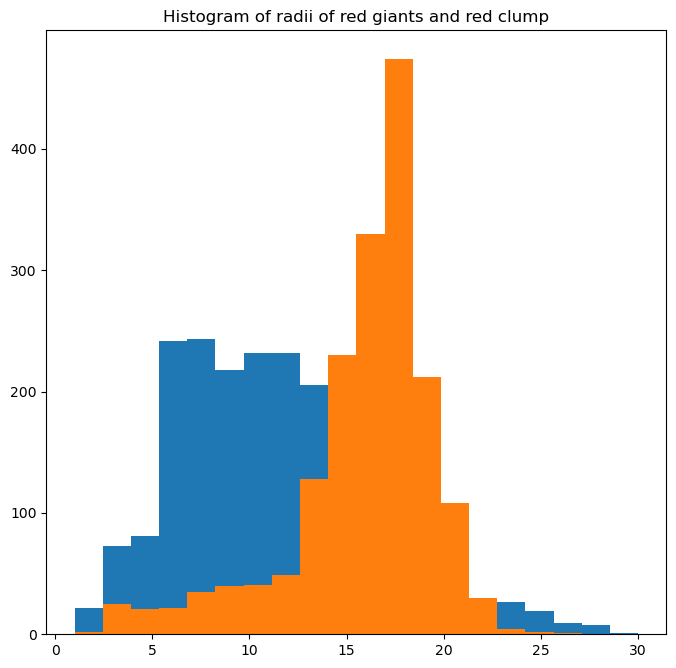

In [245]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
print(Huber_radius_final[red_giant])
plt.hist(Huber_radius_final[red_giant], bins = 20, range = (1, 30))
plt.hist(Huber_radius_final[red_clump], bins = 20, range = (1, 30))

plt.title('Histogram of radii of red giants and red clump')
plt.show()
#red clump stars are larger -- larger granules
#histogram of radii -- label

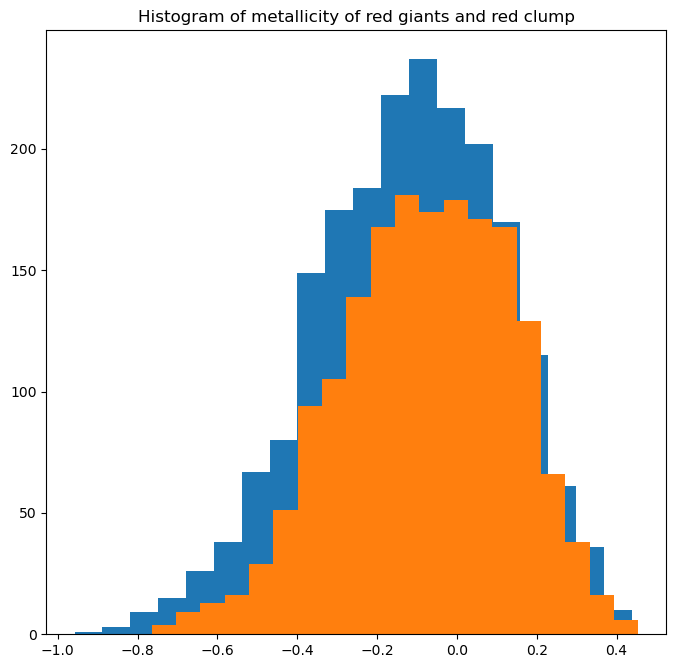

In [246]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.hist(FeH_final[red_giant], bins = 20)
plt.hist(FeH_final[red_clump], bins = 20)
plt.title('Histogram of metallicity of red giants and red clump')
plt.show()
#metallicity is more or less the same distribution in both giants and clump -- no bias
#stars are more evolved and burning He in core is affecting granulation, why? It's affecting more of the amps than frequency. Why?
#histogram of metallicity for both pops -- label

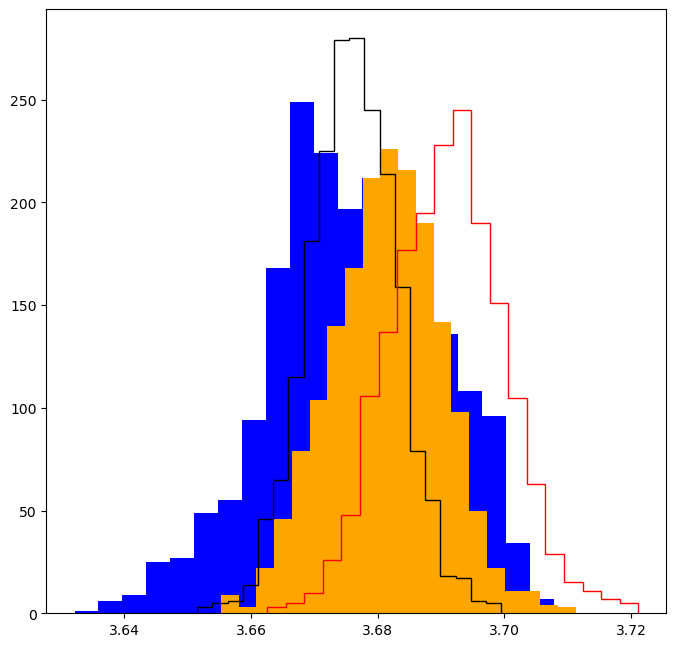

In [247]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.hist(np.log10(Teff_final[red_giant]), bins = 20, color = 'blue')
plt.hist(x_prime[red_giant]+mean_l_teff, bins = 20, histtype = 'step', color = 'black')
plt.hist(np.log10(Teff_final[red_clump]), bins = 20, color = 'orange')
plt.hist(x_prime[red_clump]+mean_l_teff, bins = 20, histtype = 'step', color = 'red')
plt.show()
#probing two different temp-like regions (both could bias the fits

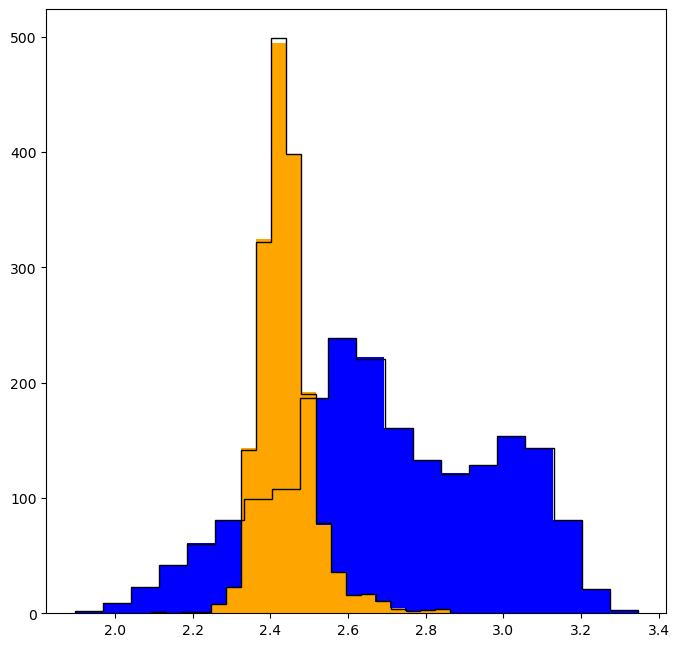

In [248]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.hist(logg_final[red_giant], bins = 20, color = 'blue')
plt.hist(y_prime[red_giant]+mean_logg, bins = 20, histtype = 'step', color = 'black')
plt.hist(logg_final[red_clump], bins = 20, color = 'orange')
plt.hist(y_prime[red_clump]+mean_logg, bins = 20, histtype = 'step', color = 'black')
plt.show()

In [249]:
#Taking similar samples of both pops < epsilon distance in parameter space (Teff, logg, metallicity)
#to find distance: loop through clump stars
#num of stars in red clump
N_RC = np.size(red_clump)
log_Teff_final_RG = log_Teff_final[red_giant]
log_Teff_final_RC = log_Teff_final[red_clump]
logg_final_RG = logg_final[red_giant]
logg_final_RC = logg_final[red_clump]
FeH_final_RG = FeH_final[red_giant]
FeH_final_RC = FeH_final[red_clump]
print(N_RC)
index_RC = ()
index_RG = ()
eps = 0.04
print(type(index_RC))
#print(type(red_giant))
for i in range(0, N_RC): 
    dist = np.sqrt((7*(log_Teff_final_RG-log_Teff_final_RC[i]))**2 + (logg_final_RG-logg_final_RC[i])**2 + (3*(FeH_final_RG-FeH_final_RC[i]))**2)
    min_dist = (np.min(dist))
    if min_dist < eps:
        index = np.where(dist == min_dist)
        index_RC = index_RC + (i,)
        #index_RC = np.append(index_RC, i)
        index_RG = index_RG + (index[0],)
        #print(index[0])
print(np.size(index_RC), np.size(index_RG))
print(index_RG)
np.shape(index_RG)
#plot 594 and do curve fit for this subsample
#print them from the fitting
#recreate coeff graph below, keep it unrotated for now

1756
<class 'tuple'>
150 150
(array([683], dtype=int64), array([990], dtype=int64), array([432], dtype=int64), array([741], dtype=int64), array([694], dtype=int64), array([1757], dtype=int64), array([1903], dtype=int64), array([1636], dtype=int64), array([1545], dtype=int64), array([1214], dtype=int64), array([433], dtype=int64), array([1757], dtype=int64), array([447], dtype=int64), array([1757], dtype=int64), array([197], dtype=int64), array([1005], dtype=int64), array([910], dtype=int64), array([220], dtype=int64), array([676], dtype=int64), array([233], dtype=int64), array([1214], dtype=int64), array([226], dtype=int64), array([716], dtype=int64), array([562], dtype=int64), array([1798], dtype=int64), array([688], dtype=int64), array([40], dtype=int64), array([787], dtype=int64), array([233], dtype=int64), array([910], dtype=int64), array([1757], dtype=int64), array([1757], dtype=int64), array([448], dtype=int64), array([1903], dtype=int64), array([990], dtype=int64), array([1757],

(150, 1)

In [250]:
iu = np.unique(index_RG, return_index=True)
iu = np.array(iu)[1,:]
print(np.shape(iu))
print(iu)

#print(np.size(index_RG))

(65,)
[ 26  45  50 113  14  17  21  19 138 110  71 124 132  98   2  10  12  32
  46  23  47 133  89  43  55  18   0  25   4  22   3 100  27  42  49  16
 106  54  65   1  15  57 122   9 101 142  99  56 146  52   8   7  80 126
   5  91  24 104  66  60 108   6 131  40  68]


In [251]:
#how to write sigma to be correct shape? np.reshape(Amp_HV1_err_log, ___ )? 

#print(np.size(index_RG[iu]))
print(np.shape(index_RG))
print(np.shape(iu))

Ni_RG = len(index_RG)
Ni_RC = len(index_RC)
N_iu = len(iu)
#ia = iu[0,:]
index_RG = np.reshape(index_RG, (Ni_RG,))
index_RC = np.reshape(index_RC, (Ni_RC,))
#iu = np.reshape(iu, (1, N_iu))
#print(min(iu))
#print(max(iu))
#print(type(index_RG))
#print(type(red_giant))
#print(np.shape(log_Teff_final_RG[index_RG]))
#print(np.shape(Amp_HV1_RG[index_RG]))


print(np.shape(iu))
print(np.shape(index_RG))
index_RC = index_RC[iu]
index_RG = index_RG[iu]
#print(np.size(index_RG))

#amplitude 1 red giants subsample
Amp_HV1_RG = Amp_HV1_R[red_giant]
Amp_HV1_RC = Amp_HV1_R[red_clump]
#print(np.size(index_RC), np.size(index_RG))
#print(Ni_RC, Ni_RG)
index_inliers = np.where((np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC])) > (-2.4))
print(np.shape(index_inliers))
print(np.shape(index_RC))
index_RC = index_RC[index_inliers]
index_RG = index_RG[index_inliers]

Amp_HV1_err_log_RG = Amp_HV1_R_err_log[red_giant]
#Amp_HV1_RG = Amp_HV1_final[red_giant]
#Amp_HV1_err_log_RG = Amp_HV1_err_log[red_giant]
#print(np.shape(Amp_HV1_err_log_RG[index_RG]))
#print(min(Amp_HV1_err_log_RG), max(Amp_HV1_err_log_RG))
#print(Amp_HV1_err_log[red_giant[index_RG]])

A1_Rg_s_opt, A1_Rg_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RG[index_RG], logg_final_RG[index_RG], FeH_final_RG[index_RG]), np.log10(Amp_HV1_RG[index_RG]), sigma=(Amp_HV1_err_log_RG[index_RG]))
A1_Rg_s_perr = np.sqrt(np.diag(A1_Rg_s_cov))
print('A1_RG_s')
print(A1_Rg_s_opt)
print(A1_Rg_s_perr)

#amp 1 red clump subsample
#Amp_HV1_RC = Amp_HV1_final[red_clump]
#Amp_HV1_err_log_RC = Amp_HV1_err_log[red_clump]

Amp_HV1_err_log_RC = Amp_HV1_R_err_log[red_clump]

A1_Rc_s_opt, A1_Rc_s_cov = curve_fit(amp_curve_fit, (log_Teff_final_RC[index_RC], logg_final_RC[index_RC], FeH_final_RC[index_RC]), np.log10(Amp_HV1_RC[index_RC]), sigma=(Amp_HV1_err_log_RC[index_RC]))
A1_Rc_s_perr = np.sqrt(np.diag(A1_Rc_s_cov))
print('A1_RC_s')
print(A1_Rc_s_opt)
print(A1_Rc_s_perr)

(150, 1)
(65,)
(65,)
(150,)
(1, 65)
(65,)
A1_RG_s
[120.68575093 -31.3271416   -0.68889572  -0.47309271]
[15.11688604  4.2043086   0.17913385  0.1386212 ]
A1_RC_s
[ 53.29712356 -13.1721431   -0.26334858  -0.53365092]
[9.92528225 2.75460067 0.11917986 0.0916792 ]


65 65


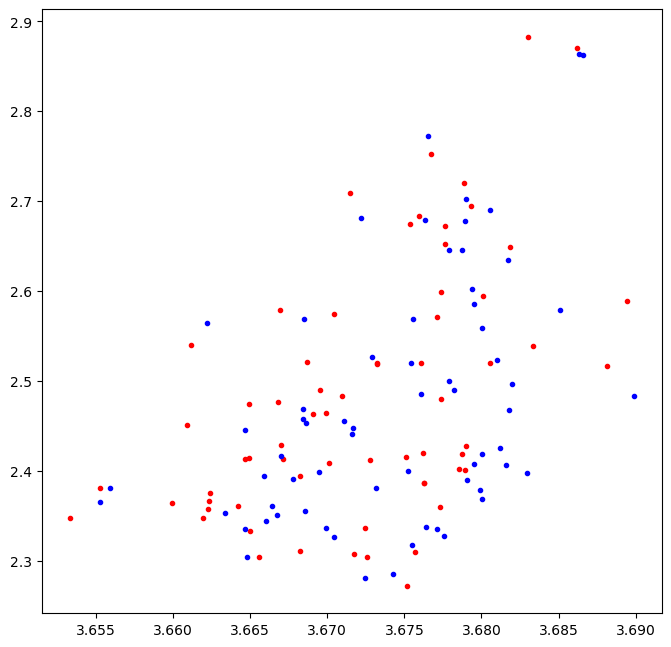

In [252]:
#you see fewer redpoints than blue points, some indexes are same star because the same red giant can be paired with several clump stars
%matplotlib inline
print(np.size(np.unique(index_RG)), np.size(index_RG))

figure(figsize=(8,8), dpi=100)
plt.plot(log_Teff_final_RG[index_RG], logg_final_RG[index_RG],'r.')
plt.plot(log_Teff_final_RC[index_RC], logg_final_RC[index_RC],'b.')
plt.show()

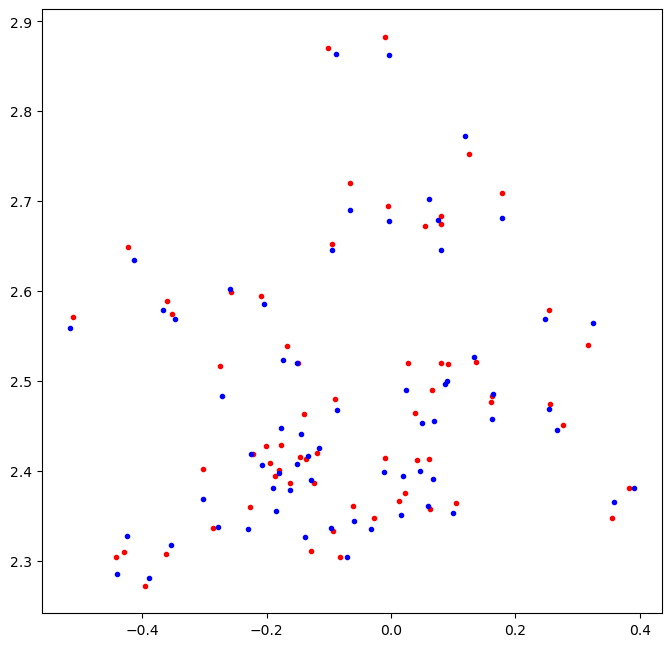

In [253]:
figure(figsize=(8,8), dpi=100)
plt.plot(FeH_final_RG[index_RG], logg_final_RG[index_RG],'r.')
plt.plot(FeH_final_RC[index_RC], logg_final_RC[index_RC],'b.')
plt.show()

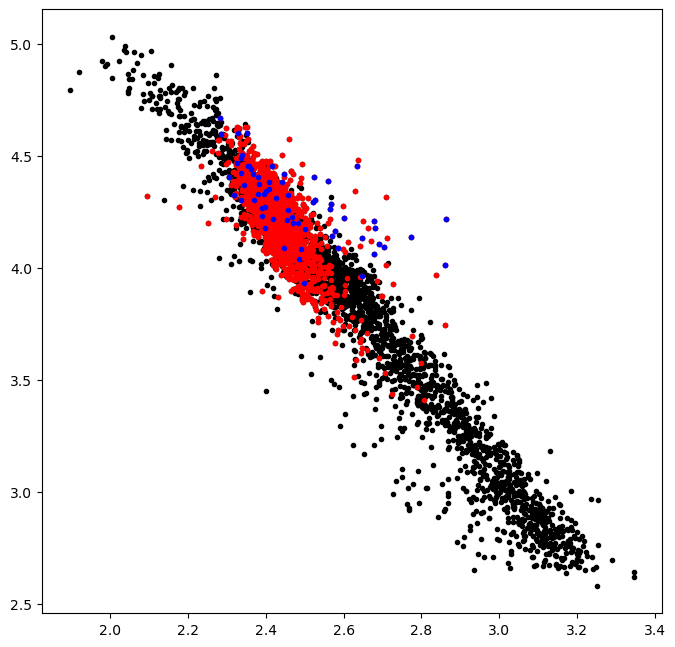

In [254]:
figure(figsize=(8,8), dpi=100)
plt.plot(logg_final, np.log10(Amp_HV1_R), 'k.')
plt.plot(logg_final_RC, np.log10(Amp_HV1_RC), 'r.')
plt.plot(logg_final_RC[index_RC], np.log10(Amp_HV1_RC[index_RC]), 'b.')
#amplitudes are from PSD, so values are multiplied by R^2. See Appollinaire paper

In [255]:
%matplotlib qt
figure(figsize=(8,8), dpi=100)
plt.plot(logg_final, np.log10(Amp_HV1_R), 'k.')
plt.plot(logg_final_RC, np.log10(Amp_HV1_RC), 'r.')
plt.plot(logg_final_RG[index_RG], np.log10(Amp_HV1_RG[index_RG]), 'b.')
#lots or outliers of red giant sample
#skewed subsample of giants for Teff coeff

In [256]:
figure(figsize=(8,8), dpi=100)
plt.plot(np.abs(logg_final_RG[index_RG]-logg_final_RC[index_RC]), 'b')
plt.plot(np.abs(FeH_final_RG[index_RG]-FeH_final_RC[index_RC]), 'g')
plt.plot(np.abs(log_Teff_final_RG[index_RG]-log_Teff_final_RC[index_RC]), 'r')
plt.show()

In [257]:
figure(figsize=(8,8), dpi=100)
plt.plot(0.5*(logg_final_RG[index_RG]+logg_final_RC[index_RC]), np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC]),'b.')
plt.show()
figure(figsize=(8,8), dpi=100)
plt.plot(0.5*(log_Teff_final_RG[index_RG]+log_Teff_final_RC[index_RC]), np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC]),'b.')
plt.show()
figure(figsize=(8,8), dpi=100)
plt.plot(0.5*(FeH_final_RG[index_RG]+FeH_final_RC[index_RC]), np.log10(Amp_HV1_RG[index_RG])-np.log10(Amp_HV1_RC[index_RC]),'b.')
plt.show()

In [258]:
figure(figsize=(8,8), dpi=100)
Huber_radius_RG = Huber_radius_final[red_giant]
Huber_radius_RC = Huber_radius_final[red_clump]
plt.hist(Huber_radius_RG[index_RG])
#clump is orange
plt.hist(Huber_radius_RC[index_RC])
plt.hist(Huber_radius_RG[index_RG], histtype='step', color='black')
plt.hist(Huber_radius_RC[index_RC], histtype='step', color='black')
plt.show()
#histogram of huber radii from red giant and red clump subsample

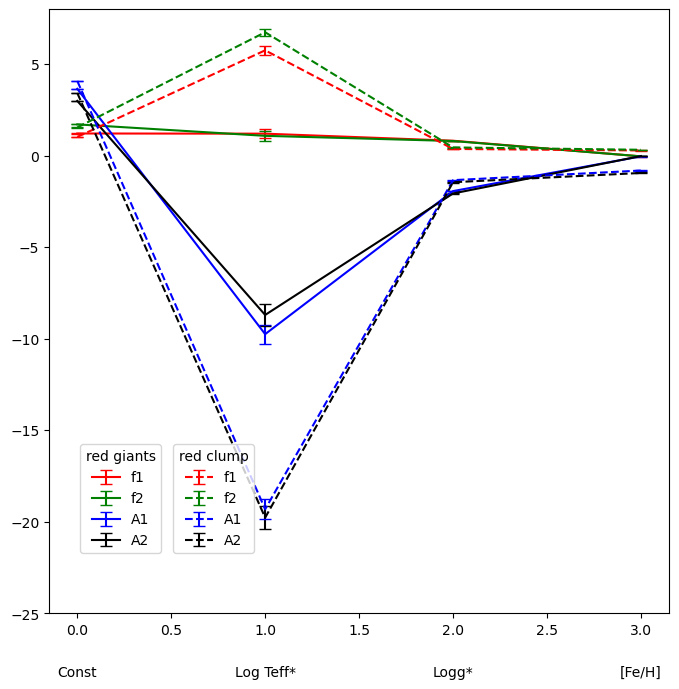

In [259]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
#print(np.amin(coeffs[:,:,0]))
minimum = np.amin(coeffs)
maximum = np.amax(coeffs)
margin = (maximum - minimum)*0.03
x = [0, 1, 2, 3]

#giants
line1= plt.errorbar(x, np.reshape(coeffs[:,0,0], 4), yerr = np.reshape(coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1')
line2 = plt.errorbar(x, np.reshape(coeffs[:,1,0], 4), yerr = np.reshape(coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2')
line3 = plt.errorbar(x, np.reshape(coeffs[:,2,0], 4), yerr = np.reshape(coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1')
line4 = plt.errorbar(x, np.reshape(coeffs[:,3,0], 4), yerr = np.reshape(coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2')
leg1 = plt.legend(handles=[line1, line2, line3, line4], title = 'red giants', loc = (0.05,0.1))

#clump
line5 = plt.errorbar(x, np.reshape(coeffs[:,0,1], 4), yerr = np.reshape(coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1')
line6 = plt.errorbar(x, np.reshape(coeffs[:,1,1], 4), yerr = np.reshape(coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2')
line7 = plt.errorbar(x, np.reshape(coeffs[:,2,1], 4), yerr = np.reshape(coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1')
line8 = plt.errorbar(x, np.reshape(coeffs[:,3,1], 4), yerr = np.reshape(coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2')
plt.gca().add_artist(leg1)
plt.legend(handles=[line5, line6, line7, line8], title = 'red clump', loc = (0.2,0.1))

plt.ylim(-25, 8)
plt.text(0, minimum-0.7*margin, 'Const', ha = 'center')
plt.text(1, minimum-0.7*margin, 'Log Teff*', ha = 'center')
plt.text(2, minimum-0.7*margin, 'Logg*', ha = 'center')
plt.text(3, minimum-0.7*margin, '[Fe/H]', ha = 'center')
plt.show()

#when logg increases, amplitudes decrease
#when star is evolving, it gets bigger, meaning larger granules at surface, larger amps Harvey func
#when star evolves f increases bc granule cells are bigger and it wil take longer to go through the convection zone
#not expected frequencies to change b/w two populations. But amp could change bc radii is different. Size of ganules is independent of radius. 
#larger stars -- smaller amp with smaller signal for same surface parameters. Anti correlated with radius. 1/R
#see email on how to change Log Teff and Logg, make new rotated plot without stars in annotation
#make new lines for HV1_R HV2_R in new colors, etc
#check AAS poster requirements

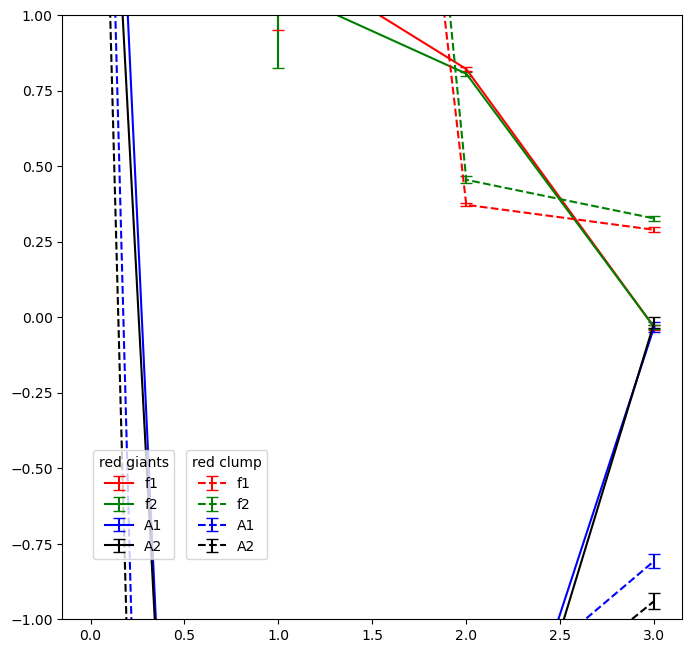

In [267]:
#zoomed in graph
%matplotlib inline
figure(figsize=(8,8), dpi=100)

line1= plt.errorbar(x, np.reshape(coeffs[:,0,0], 4), yerr = np.reshape(coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1')
line2 = plt.errorbar(x, np.reshape(coeffs[:,1,0], 4), yerr = np.reshape(coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2')
line3 = plt.errorbar(x, np.reshape(coeffs[:,2,0], 4), yerr = np.reshape(coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1')
line4 = plt.errorbar(x, np.reshape(coeffs[:,3,0], 4), yerr = np.reshape(coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2')
leg1 = plt.legend(handles=[line1, line2, line3, line4], title = 'red giants', loc = (0.05,0.1))

line5 = plt.errorbar(x, np.reshape(coeffs[:,0,1], 4), yerr = np.reshape(coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1')
line6 = plt.errorbar(x, np.reshape(coeffs[:,1,1], 4), yerr = np.reshape(coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2')
line7 = plt.errorbar(x, np.reshape(coeffs[:,2,1], 4), yerr = np.reshape(coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1')
line8 = plt.errorbar(x, np.reshape(coeffs[:,3,1], 4), yerr = np.reshape(coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2')
plt.gca().add_artist(leg1)
plt.legend(handles=[line5, line6, line7, line8], title = 'red clump', loc = (0.2,0.1))

plt.ylim(-1, 1)
#plt.text(0, minimum-0.7*margin, 'Const', ha = 'center')
#plt.text(1, minimum-0.7*margin, 'Log Teff*', ha = 'center')
#plt.text(2, minimum-0.7*margin, 'Logg*', ha = 'center')
#plt.text(3, minimum-0.7*margin, '[Fe/H]', ha = 'center')
plt.show()

#red giants, both f and A, (black and blue solid lines) are very close to 0. There is no correlation to metallicity.
#red clump, there is a slight pos correlation inf f of granulation and much stronger anticorrelation for the amps
#discuss above point with Regner to see if results are expected
#why are red giants and red clump so different? (red clump stars are more evolved, burning He in core, did that change something in their convection?)

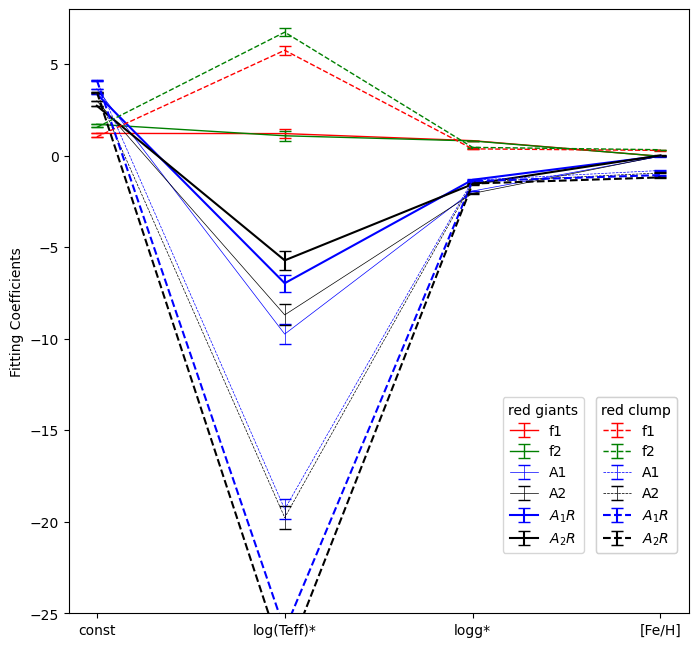

In [261]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)

#transformed coefficient plot from Radius overplotted on untransformed one

xl = 0.70
dxl = 0.15

#giants
line1 = plt.errorbar(x, np.reshape(coeffs[:,0,0], 4), yerr = np.reshape(coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(coeffs[:,1,0], 4), yerr = np.reshape(coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(coeffs[:,2,0], 4), yerr = np.reshape(coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(coeffs[:,3,0], 4), yerr = np.reshape(coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(coeffs[:,4,0], 4), yerr = np.reshape(coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R$') #put R as subscript
line6 = plt.errorbar(x, np.reshape(coeffs[:,5,0], 4), yerr = np.reshape(coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(coeffs[:,0,1], 4), yerr = np.reshape(coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(coeffs[:,1,1], 4), yerr = np.reshape(coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(coeffs[:,2,1], 4), yerr = np.reshape(coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(coeffs[:,3,1], 4), yerr = np.reshape(coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(coeffs[:,4,1], 4), yerr = np.reshape(coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R$')
line12 = plt.errorbar(x, np.reshape(coeffs[:,5,1], 4), yerr = np.reshape(coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R$')
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for radius but coeffs of teff and logg not rotated back yet
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)*', 'logg*', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-25, 8)
plt.show()
#maybe make legend bigger or dashed lines easier to see

In [262]:
%matplotlib qt
Tg_coeffs = np.ones([4, 6, 2])
Tg_coeffs_err = np.ones([4, 6, 2])
for i in range(0,6):
    for j in range(0,2):
        Tg_coeffs[0, i, j] = coeffs[0, i, j]
        Tg_coeffs[1, i, j] = coeffs[1, i, j]*np.cos(theta) + coeffs[2, i, j]*np.sin(theta)
        Tg_coeffs[2, i, j] = coeffs[2, i, j]*np.cos(theta) - coeffs[1, i, j]*np.sin(theta)
        Tg_coeffs[3, i, j] = coeffs[3, i, j]
        
        Tg_coeffs_err[0, i, j] = coeffs_err[0, i, j]
        Tg_coeffs_err[1, i, j] = coeffs_err[1, i, j]*np.cos(theta) + coeffs_err[2, i, j]*np.sin(theta)
        Tg_coeffs_err[2, i, j] = coeffs_err[2, i, j]*np.cos(theta) - coeffs_err[1, i, j]*np.sin(theta)
        Tg_coeffs_err[3, i, j] = coeffs_err[3, i, j]

xl = 0.70
dxl = 0.15
figure(figsize=(8,8), dpi=100)

#giants
line1 = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,0], 4), yerr = np.reshape(Tg_coeffs_err[:,0,0], 4), fmt ='r', capsize = 4, label = 'f1', linewidth = 1)
line2 = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,0], 4), yerr = np.reshape(Tg_coeffs_err[:,1,0], 4), fmt ='g', capsize = 4, label = 'f2', linewidth = 1)
line3 = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,0], 4), yerr = np.reshape(Tg_coeffs_err[:,2,0], 4), fmt ='b', capsize = 4, label = 'A1', linewidth = 0.5)
line4 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,0], 4), yerr = np.reshape(Tg_coeffs_err[:,3,0], 4), fmt ='k', capsize = 4, label = 'A2', linewidth = 0.5)
line5 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,0], 4), yerr = np.reshape(Tg_coeffs_err[:,4,0], 4), fmt ='b', capsize = 4, label = '$A_1 R$') 
line6 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,0], 4), yerr = np.reshape(Tg_coeffs_err[:,5,0], 4), fmt ='k', capsize = 4, label = '$A_2 R$')
leg_giant = plt.legend(handles=[line1, line2, line3, line4, line5, line6], title = 'red giants', loc = (xl,0.1))
plt.gca().add_artist(leg_giant)


#clump
line7  = plt.errorbar(x, np.reshape(Tg_coeffs[:,0,1], 4), yerr = np.reshape(Tg_coeffs_err[:,0,1], 4), fmt = 'r', capsize = 4, linestyle='dashed', label = 'f1', linewidth = 1)
line8  = plt.errorbar(x, np.reshape(Tg_coeffs[:,1,1], 4), yerr = np.reshape(Tg_coeffs_err[:,1,1], 4), fmt = 'g', capsize = 4, linestyle='dashed', label = 'f2', linewidth = 1)
line9  = plt.errorbar(x, np.reshape(Tg_coeffs[:,2,1], 4), yerr = np.reshape(Tg_coeffs_err[:,2,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = 'A1', linewidth = 0.5)
line10 = plt.errorbar(x, np.reshape(Tg_coeffs[:,3,1], 4), yerr = np.reshape(Tg_coeffs_err[:,3,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = 'A2', linewidth = 0.5)
line11 = plt.errorbar(x, np.reshape(Tg_coeffs[:,4,1], 4), yerr = np.reshape(Tg_coeffs_err[:,4,1], 4), fmt = 'b', capsize = 4, linestyle='dashed', label = '$A_1 R$')
line12 = plt.errorbar(x, np.reshape(Tg_coeffs[:,5,1], 4), yerr = np.reshape(Tg_coeffs_err[:,5,1], 4), fmt = 'k', capsize = 4, linestyle='dashed', label = '$A_2 R$') #R^2
leg_clump = plt.legend(handles=[line7, line8, line9, line10, line11, line12], title = 'red clump', loc = (xl+dxl,0.1))
plt.gca().add_artist(leg_clump)


#Amps corrected for radius with Log(Teff) and Logg rotated back
#might need to multiply amps by R^2 if they are from the power spectrum
plt.ylim(minimum - margin, maximum + margin)

plt.xticks([0, 1, 2, 3], ['const', 'log(Teff)', 'logg', '[Fe/H]'])
plt.ylabel('Fitting Coefficients')
plt.ylim(-25, 8)
plt.show()

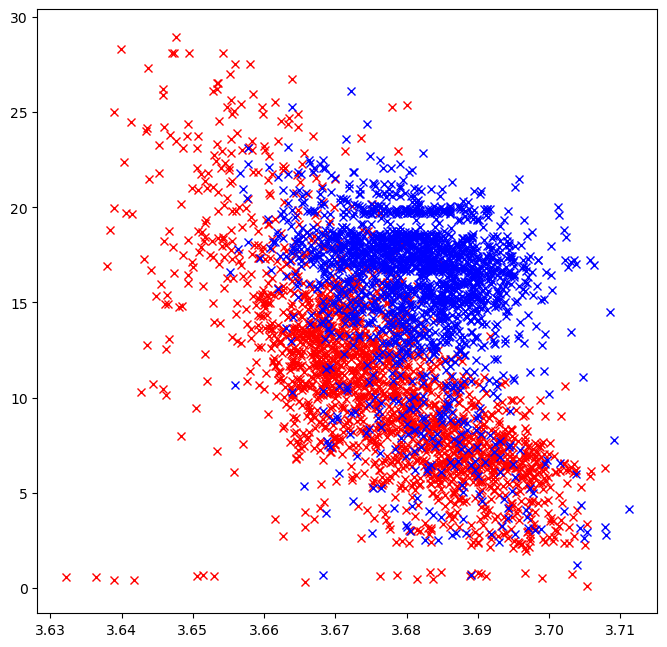

In [263]:
%matplotlib inline
figure(figsize=(8,8), dpi=100)
plt.plot(np.log10(Teff_final[red_giant]), Huber_radius_final[red_giant], 'rx')
plt.plot(np.log10(Teff_final[red_clump]), Huber_radius_final[red_clump], 'bx')
plt.show()

In [264]:
from scipy.optimize import curve_fit
%matplotlib qt

def coeffs_curve_fit(X, a, b, c, d):
    x,y,z = X
    return a+b*x+c*y+z*d

Nt = 6 
NFeH = 6
X_grid = np.indices((Nt, NFeH))

logT_clump_grid = (X_grid[0,:,:]*(max(np.log10(Teff_final[red_clump]))-min(np.log10(Teff_final[red_clump]))))/(Nt-1)+min(np.log10(Teff_final[red_clump]))
logg_clump_grid = (X_grid[1,:,:]*(max(logg_final[red_clump])-min(logg_final[red_clump])))/(NFeH-1)+min(logg_final[red_clump])

log_A1_grid = coeffs_curve_fit((logT_grid, logg_grid, FeH_grid), Tg_coeffs[:,2,0], Tg_coeffs[:,3,0], Tg_coeffs[:,5, 0], Tg_coeffs[:,6, 0])
log_A2_grid = coeffs_curve_fit((logT_grid, logg_grid, FeH_grid), Tg_coeffs[0, 5, 0], Tg_coeffs[1, 5, 0], Tg_coeffs[2, 5, 0], Tg_coeffs[3, 5, 0])

log_A1_clump_grid = coeffs_curve_fit((logT_clump_grid, logg_clump_grid, FeH_grid), Tg_coeffs[0, 4, 1], Tg_coeffs[1, 4, 1], Tg_coeffs[2, 4, 1], Tg_coeffs[3, 4, 1])
log_A2_clump_grid = coeffs_curve_fit((logT_clump_grid, logg_clump_grid, FeH_grid), Tg_coeffs[0, 5, 1], Tg_coeffs[1, 5, 1], Tg_coeffs[2, 5, 1], Tg_coeffs[3, 5, 1])

#log_A1_grid = coeffs_curve_fit((logT_grid, logg_grid, FeH_grid), Tg_coeffs[0, 4, 0], Tg_coeffs[1, 4, 0], Tg_coeffs[2, 4, 0], Tg_coeffs[3, 4, 0])
#log_A2_grid = coeffs_curve_fit((logT_grid, logg_grid, FeH_grid), Tg_coeffs[0, 5, 0], Tg_coeffs[1, 5, 0], Tg_coeffs[2, 5, 0], Tg_coeffs[3, 5, 0])

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV1_R), 'rx')
plt.plot(np.log10(Teff_final), logg_final, np.log10(Amp_HV2_R), 'bx')
ax.plot_wireframe(logT_clump_grid, logg_clump_grid, log_A1_clump_grid, color='maroon')
ax.plot_wireframe(logT_clump_grid, logg_clump_grid, log_A2_clump_grid, color='navy')
ax.plot_wireframe(logT_grid, logg_grid, log_A1_grid, color='maroon')
ax.plot_wireframe(logT_grid, logg_grid, log_A2_grid, color='navy')



IndexError: index 6 is out of bounds for axis 1 with size 6